# Criação do ambiente virtual

In [1]:
# creation of virtual envoirment
#!python -m venv ds_fmq

In [2]:
# ativar o ambiente virtual
!ds_fmq\Scripts\activate

In [3]:
#!pip3 install -r requirements.txt

# Programing

## Load Dataset

In [4]:
import pandas as pd   #imports
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('ds_fmq_data.csv').set_index('id').reset_index(drop=True); df.head(2)

,game_id,bet,denomination,ballIdx,nr_cards,ball_price,won,highest_oneaway,total_oneaway,bought,highest_prize_won,bonus_prize,market,game
0,b1409fc0-f031-4140-be34-c8357d36e994,1.0,1.0,2.0,20.0,17.0,34.0,14.0,391.0,Yes,0,0,E,game_03
1,b1409fc0-f031-4140-be34-c8357d36e994,1.0,1.0,4.0,20.0,19.0,37.0,14.0,397.0,Yes,0,0,E,game_03


In [6]:
df.shape # size of dataset

(1317801, 14)

In [7]:
df.info() # looking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317801 entries, 0 to 1317800
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   game_id            1317801 non-null  object 
 1   bet                1317801 non-null  float64
 2   denomination       1317801 non-null  float64
 3   ballIdx            1317801 non-null  float64
 4   nr_cards           1317801 non-null  float64
 5   ball_price         1317801 non-null  float64
 6   won                1317801 non-null  float64
 7   highest_oneaway    1317801 non-null  float64
 8   total_oneaway      1317801 non-null  float64
 9   bought             1317801 non-null  object 
 10  highest_prize_won  1317801 non-null  int64  
 11  bonus_prize        1317801 non-null  int64  
 12  market             1317801 non-null  object 
 13  game               1317801 non-null  object 
dtypes: float64(8), int64(2), object(4)
memory usage: 140.8+ MB


## Exploratory Analysis of Each Variable by Game Type

In [8]:
df.describe().round(2) # Descriptive statistics

,bet,denomination,ballIdx,nr_cards,ball_price,won,highest_oneaway,total_oneaway,highest_prize_won,bonus_prize
count,1317801.00,1317801.00,1317801.00,1317801.00,1317801.00,1317801.00,1317801.00,1317801.00,1317801.00,1317801.00
mean,1.47,11.29,4.18,13.43,24.33,74.23,10.94,522.08,1.85,1.58
std,1.87,15.12,3.04,5.69,53.80,239.57,3.67,1015.83,3.25,103.07
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,-2.00
25%,1.00,10.00,1.00,10.00,4.00,6.00,8.00,109.00,0.00,0.00
50%,1.00,10.00,3.00,12.00,11.00,15.00,11.00,259.00,0.00,0.00
75%,1.00,10.00,6.00,20.00,26.00,58.00,14.00,596.00,3.00,0.00
max,100.00,200.00,12.00,20.00,4520.00,33100.00,19.00,69940.00,19.00,48000.00


In [9]:
# Here we have the proportion of data for each game in the whole original dataframe, this is important so research for 
# anormality at the data.
df.game.value_counts(normalize=True)

game_01    0.430014
game_02    0.326413
game_03    0.243572
Name: game, dtype: float64

### Metrics

In [10]:
import seaborn as sns
sns.set(rc={"figure.figsize":(17, 3)})# set seaborn standard image size

In [11]:
# barplot of game columns. You can change the x visualization limits also. minR = -99: no zoom
def barplot_view(column_view, minR_x, maxR_x):
    data = [df[df['game'] == 'game_01'][column_view], df[df['game'] == 'game_02'][column_view], 
            df[df['game'] == 'game_03'][column_view]]    
    fig, ax = plt.subplots(figsize=(17, 3))
    bp = ax.boxplot(data, vert=False)
    if minR_x != -99: plt.xlim([minR_x, maxR_x]) # condition for zooming
    ax.set(title='Column \''+column_view+'\' for Game #', xlabel='Values of \''+column_view+'\'', ylabel='Game #')
    plt.show()

In [12]:
# Modified upper function for special case # minR = -99: no zoom
def barplot_view_mod(data, minR_x, maxR_x, description):
    fig, ax = plt.subplots(figsize=(17, 3))
    bp = ax.boxplot(data, vert=False)
    if minR_x != -99: plt.xlim([minR_x, maxR_x]) # condition for zooming
    ax.set(title=description, xlabel='Values of '+description, ylabel='Game #')
    plt.show()

#### __Column A: game_id__
_Description:_ code for a game round where a played were offered the possibility of buying extra balls;

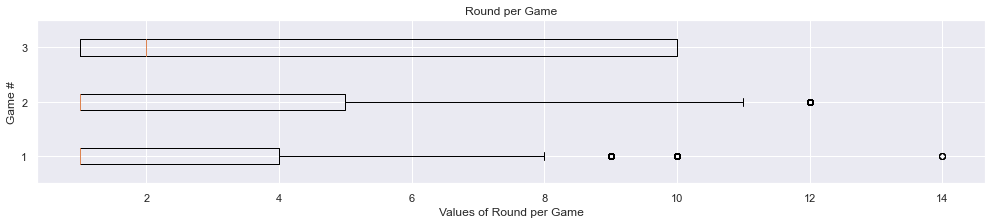

In [13]:
countG1 = df[df['game'] == 'game_01'].game_id.value_counts() # Save the count of possibilities for each game
countG2 = df[df['game'] == 'game_02'].game_id.value_counts()
countG3 = df[df['game'] == 'game_03'].game_id.value_counts()
data = [countG1.values, countG2.values, countG3.values] 
barplot_view_mod(data, -99, 0, 'Round per Game')

_Conclusion:_ From this plot we can conclude that in general the players recive more possibility of buying an extra balls at Game 3, followed by Game 2. At Game 3 the median value is two times of the other games median, so <u>people recive more offers of buying extra balls in game 3</u> than the others.

#### __Column B: bet__
_Description:_ the amount of credits (cr) per card;

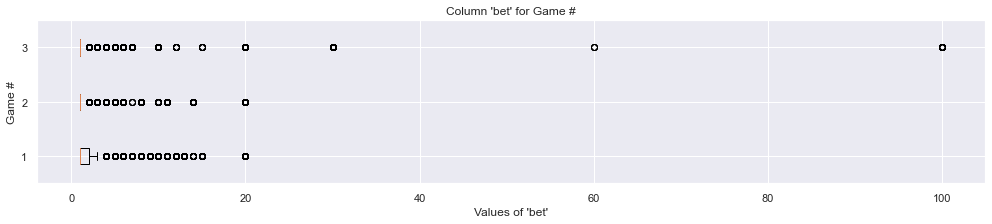

In [14]:
column_b = 'bet'
barplot_view(column_b, -99, 0)

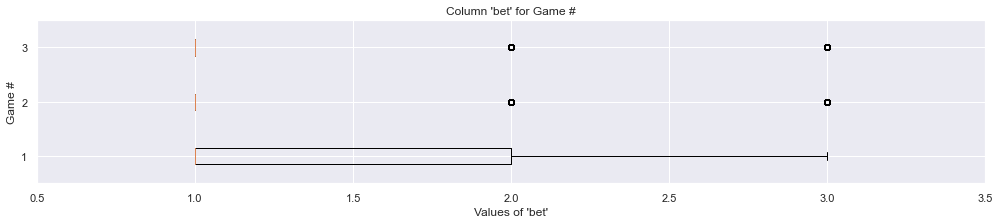

In [15]:
barplot_view(column_b, 0.5, 3.5) # Zooming the region of interest

_Conclusion:_ Here we can see that there is a difference in the frame data at bet column. <u>The credits bet per card in game 1 is higher, in general than the others.</u> At the last plot we can see that a quarter part of the data in game one is between 1.0 and 2.0 and other quarter is between 2.0 and 3.0, while almost of the data of games 2 and 3 keep at 1.0.

#### __Column C: denomination__ 
_Description:_ value (in local currency) of each credit;

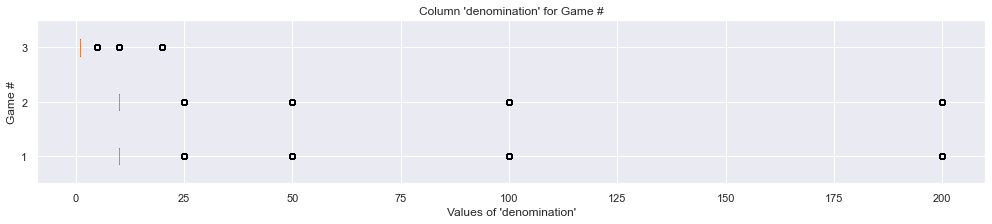

In [16]:
column_c = 'denomination'
barplot_view(column_c, -99, 0)

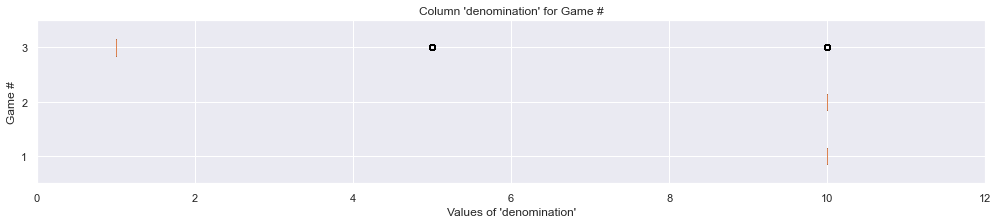

In [17]:
barplot_view(column_c, 0, 12)

_Conclusion:_ The value per credit is 10 times higher in the games 1 and 2 than in game 3, so game 3 maybe a better game for people that don't want to bet too much.

#### __Column D: ballIdx__
_Description:_ index of a given extraball;

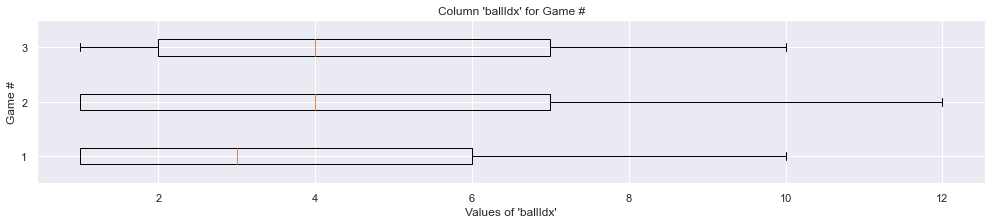

In [18]:
column_d = 'ballIdx'
barplot_view(column_d, -99, 0)

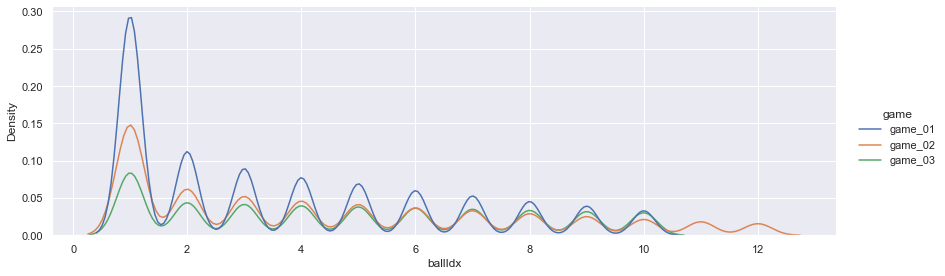

In [19]:
hue_order = ['game_01', 'game_02', 'game_03']
sns.displot(df, x=column_d, kind="kde", hue="game", hue_order=hue_order, height=4, aspect=3)

_Conclusion:_ Here we have two different conclusions: 
* the first one is that as the index of the ball grows, people risk more in buying an extra ball, maybe becouse of the price of a ball or becouse the person already won some prize and decide to stop. That is equivalent for all games;
* the second conclusion is that the game 2 gives fourteen extra balls, two more than game 1 and 3.

#### __Column E: nr_cards__
_Description:_ number of open cards for a given game round;

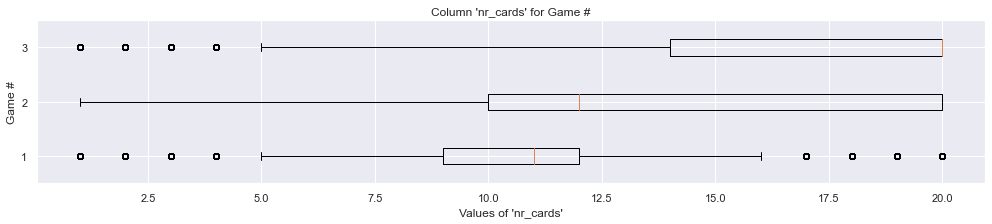

In [20]:
column_e = 'nr_cards'
barplot_view(column_e, -99, 0)

_Conclusion:_ Here we see that there are <u>more open card at game 3</u>, followed by game 2.

#### __Column F: ball_price__
_Description:_ price (cr) of a given extra ball;

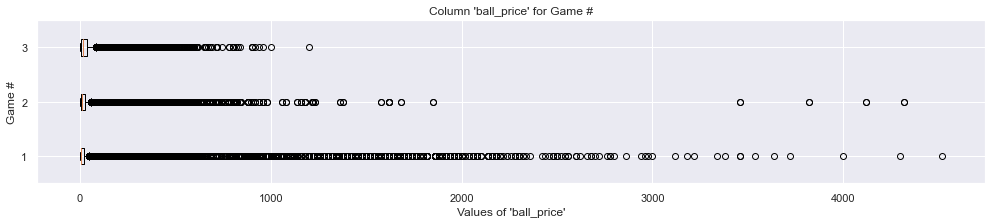

In [21]:
column_f = 'ball_price'; 
barplot_view(column_f, -99, 0)

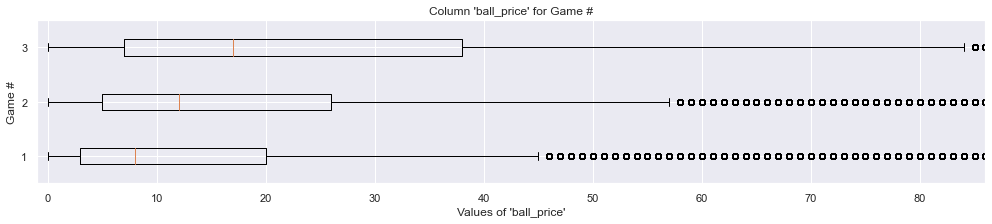

In [22]:
barplot_view(column_f, -1, 86)

_Conclusion:_ In general, <u>the price of a given extra ball is higher in Game 3</u>, followed by game 2. 

#### __Column G: won__
_Description:_ cumulative winnings (cr) of a game round;

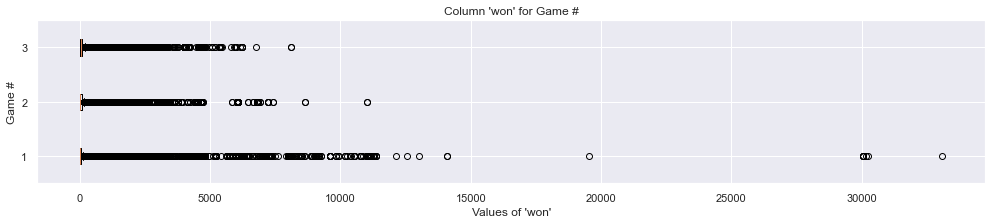

In [23]:
column_g = 'won'
barplot_view(column_g, -99, 0)

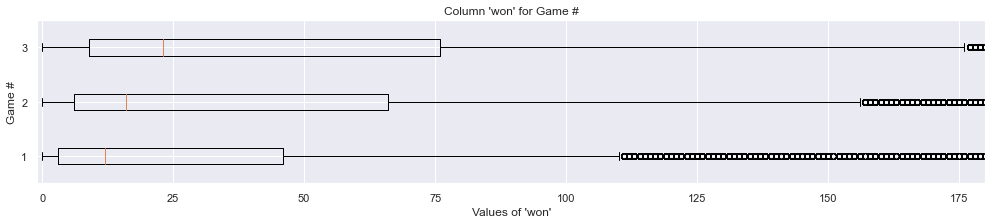

In [24]:
barplot_view(column_g, -1, 180)

_Conclusion:_ Here we can se that in general we have more cumulative winnings at game 3, followed by game 2. But the biggest cumulative winnings are outliers in Game 1. 

#### __Column H: highest_oneaway__
_Description:_ highest prize (prize id for a specific prize table**) that the player is able to win at a specific point in the game. Higher ids translate to better prizes;

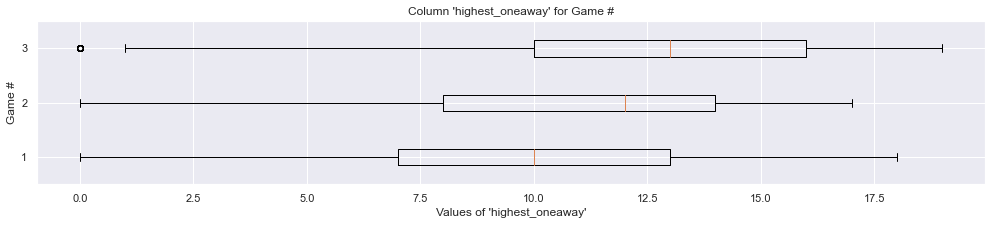

In [25]:
column_h = 'highest_oneaway'
barplot_view(column_h, -99, 0)

_Conclusions:_ Here we can see that game 3 gives possibility of highest prizes, followed by game 2.

#### __Column I: total_oneaway__
_Description:_ sum of all the prizes that the player is able to win;

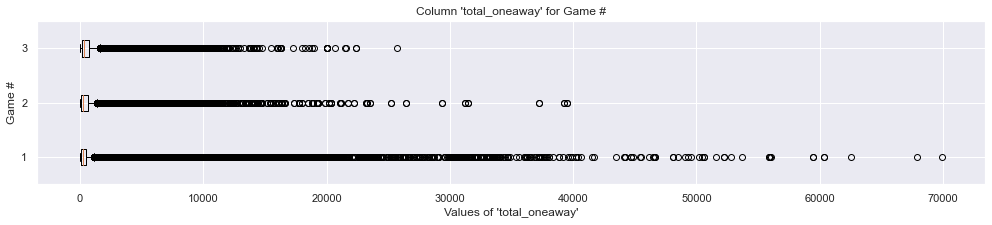

In [26]:
column_i = 'total_oneaway'
barplot_view(column_i, -99, 0)

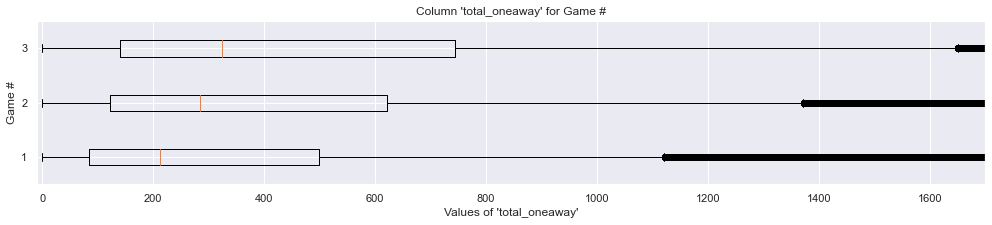

In [27]:
barplot_view(column_i, -10, 1700)

_Conclusion:_ As in the last column, the prize chances that player is able to win are higher in game 3, followed by game 2.

#### __Column J: bought__
_Description:_ decision of the player. Buy or not to buy an extra ball;

<AxesSubplot:xlabel='bought', ylabel='Count'>

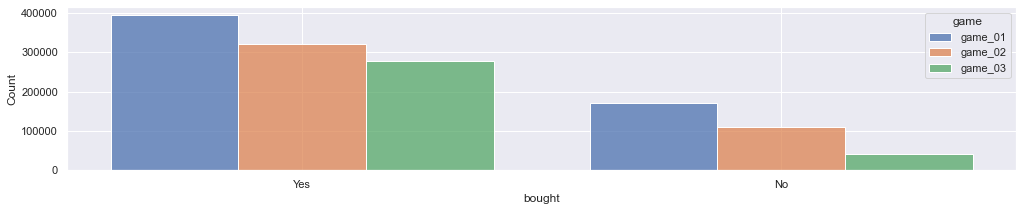

In [28]:
column_j= 'bought'
sns.histplot(df, x=column_j, hue="game", hue_order=hue_order, bins=20, multiple="dodge", shrink=.8)

_Conclusion:_ Decision of buy an extra ball depends on a serie of game factors, but here we see that in most of the data the predominant decision is YES. As we already know, game 1 have almost the double of data of game 3, but at the NO decision we can se that this is not proportional, so it's possible to conclude that players in game 3 buy more extra balls than in the other games.

#### __Column K: highest_prize_won__
_Description:_ the highest prize won on a specific extra ball and game round (prize id for a specific prize table**). Higher ids translate to better prizes;

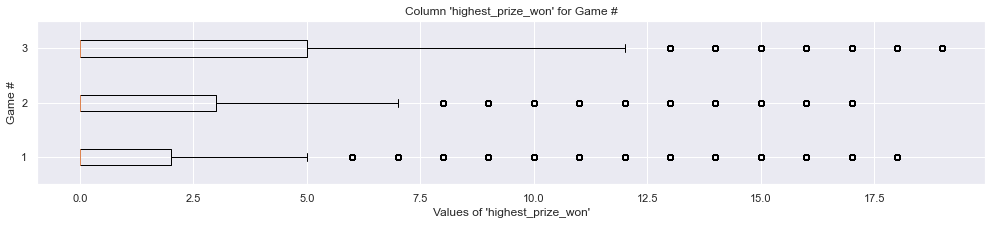

In [29]:
column_k = 'highest_prize_won'
barplot_view(column_k, -99, 0)

_Conclusion:_ Here we can se that it follows the previous pattern, the sequence that can give more extra prizes is the same that won highest prizes: Game 3, followed by Game 2.

#### __Column L: bonus_prize__
_Description:_ in case of entering a bonus, the amount (cr) won by the player;

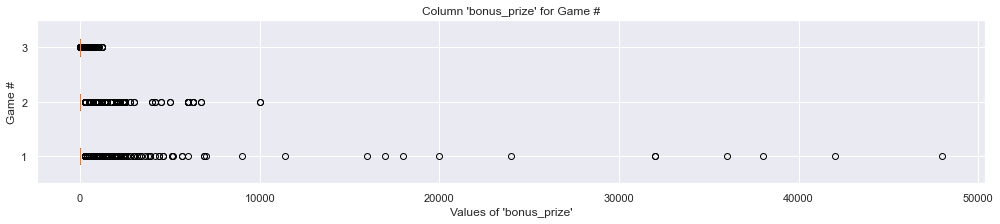

In [30]:
column_l = 'bonus_prize'
barplot_view(column_l, -99, 0)

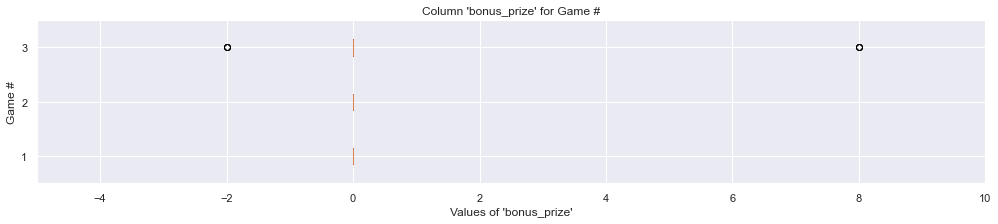

In [31]:
barplot_view(column_l, -5, 10)

_Conclusion:_ In general we can see that very few players won any bouns prize, but those who does can won more credits win game 1, followed by game 2.

#### __Column M: market__
_Description:_ code for a specific market;

<AxesSubplot:xlabel='market', ylabel='Count'>

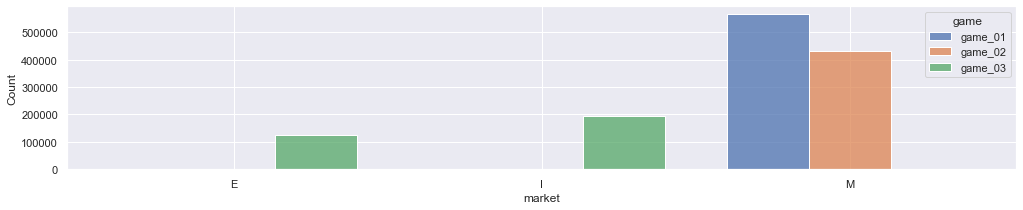

In [32]:
column_m = 'market'
sns.histplot(df, x=column_m, hue="game", hue_order=hue_order, bins=20, multiple="dodge", shrink=.8)

_Conclusion:_ As already was known, each game is develop by a specific market and game 3 goes for two different markets.

## Correlation Analysis

To make a better view of the correlation between the columns it is important to change some variables, to make the data fit at the calculations, that is why we transform the types of variables. Here we're changing the 'bought' column with that objective in a new data frame.

In [33]:
dic_YN = {'Yes': 1, 'No': 0} # converte object (yes or no) in int
revdic = {1:'Yes', 0:'No'} # dict(map(reversed, dic_YN.items())) # reverse dictionary number -> Y/N 
df2 = df.copy()
df2['bought'] = df2['bought'].map(dic_YN)

Here we are going to split data by game and remove game column. We are going to do an exploratory analysis focusing at the differences in data for each game type, so we separate the dataset for each game:

In [34]:
game1_df2 = df2[df['game'] == 'game_01'].drop('game', axis=1)
game2_df2 = df2[df['game'] == 'game_02'].drop('game', axis=1)
game3_df2 = df2[df['game'] == 'game_03'].drop('game', axis=1)

### Comparison of Correlations

As seen before, we can say that the most diferent games in data are 1 and 3. So let's see how the variables in each game are relatade between each other using a correlation matrix:

In [35]:
def correlation_heat(data_frame): # heatmap that shows the correlation between variables
    matrix = data_frame.corr().round(2)
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
    plt.show()

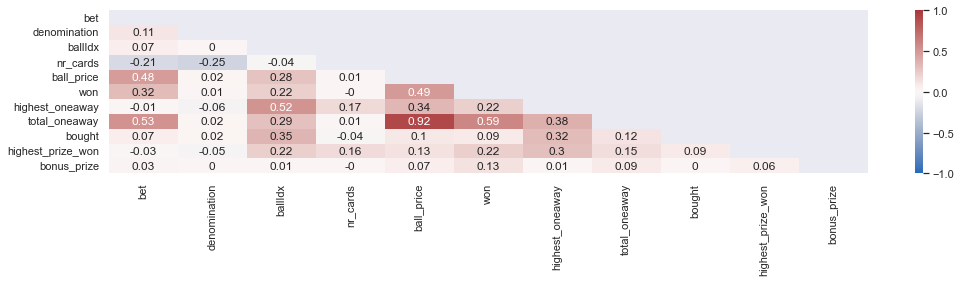

In [36]:
correlation_heat(game1_df2) # correlations in game 1

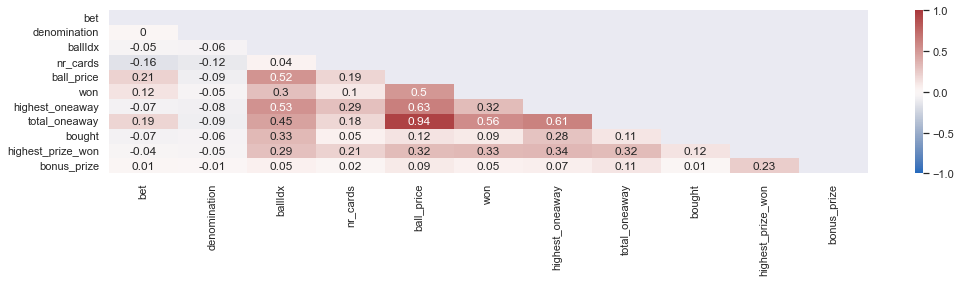

In [37]:
correlation_heat(game3_df2) # correlations in game 3

__Differences between correlations of game 1 and game 3:__<p> There are more positive and relevant correlation in Game 1 than Game 3 for:</p>
* bet _X_ total_oneaway: 
* bet _X_ won;
* bet _X_ ball_price;

From those relations we can see that in the game 1 the variable bet is more relatad with the winning variables than in game 3. That means that <u>game 1 is more coherent between bets and winnings than the game 3</u>.

Let's take a look in a comparation between the correlated variables and regression line for game 1 and game 3 as said before:

In [38]:
def regression_plot(df, y, x):
    ax = sns.pairplot(df, y_vars=y, x_vars=x, kind='reg', height=3)
    ax.fig.suptitle('Dispersion between the Variables', fontsize=20, y=1.05)
    ax

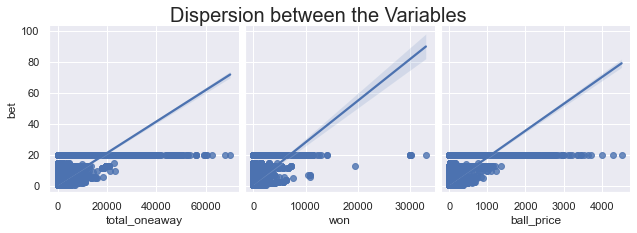

In [39]:
regression_plot(game1_df2, 'bet', ['total_oneaway', 'won', 'ball_price'])

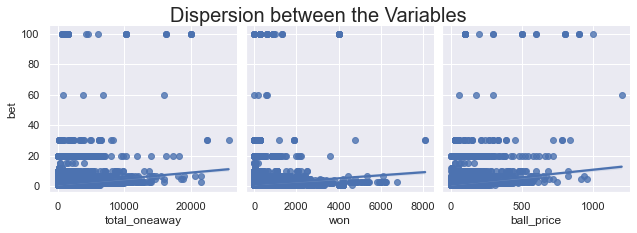

In [40]:
regression_plot(game3_df2, 'bet', ['total_oneaway', 'won', 'ball_price'])

<p> There are more positive and relevant correlation in Game 3 than Game 1 for:</p>

* highest_prize_won _X_ bonus_prize;
* highest_prize_won _X_ total_oneaway;
* highest_prize_won _X_ ball_price;
* highest_oneaway _X_ won;
* highest_oneaway _X_ ball_price;
* ballIdx _X_ total_oneaway;
* ballIdx _X_ ball_price;

Here we see that <u>game 3 have more correlation between the winnings, bonus, possible winnings, and consequently higher prices of balls</u> (that increases with prizes possibilities and with it index) than game 1.

### Whole Data Correlations

Let's take a look in the whole dataset correlations

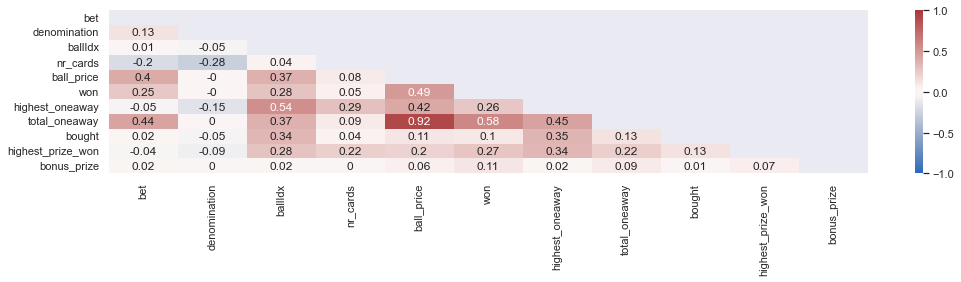

In [41]:
correlation_heat(df2)

Here we can se that this table is like a mix of the two correlation tables of games 1 and 3. The strongest correlations are:

__Very Strong__

- ball_price _X_ total_oneaway: That mean that <u>the price of an extraball is very strongly related with the prizes that the player can get</u>;

This correlation can be seen in the graphic bellow:

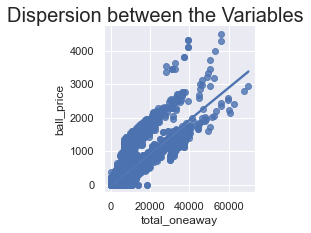

In [42]:
regression_plot(df2, 'ball_price', 'total_oneaway')

__Strong:__
- won _X_ total_oneaway: <u>The higher are the prizes possibilities, the higher is the won prizes;</u>
- won _X_ ball_price: <u>Higher prizes gives higher prices per extra balls;</u>
- bet _X_ total_oneaway: <u>The highest the bet, higher is the possible prize;</u>
- bet _X_ ball_price: <u>The highest the bet, higher is the price of a given extra ball;</u>
- highest_oneaway _X_ ballIdx: <u>The higher the prize possibilities, more extra balls is picked;</u>
- highest_oneaway _X_ total_oneaway: <u>The highest prize able to win and the sum of all prizes able to win are strong correlated.</u>

We can see this correlations in the graphics bellow:

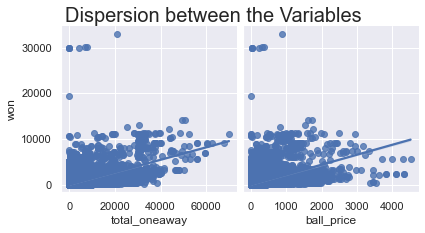

In [43]:
regression_plot(df2, 'won', ['total_oneaway','ball_price'])

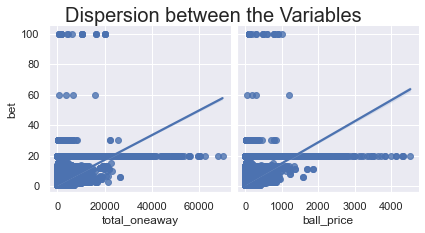

In [44]:
regression_plot(df2, 'bet', ['total_oneaway','ball_price'])

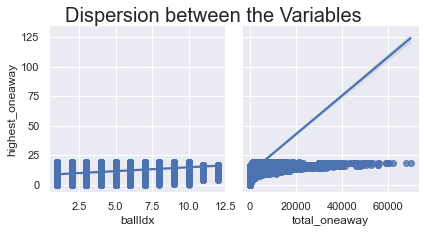

In [45]:
regression_plot(df2, 'highest_oneaway', ['ballIdx','total_oneaway'])

## Predictive Model of Buying or Not an Extra Ball for a Specific Game

Let's create some machine learning models to seek for the one that is more precise for each game, and than use it to predict if is interesting or not to buy an extra ball.

### __Machine Learning Models__

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [47]:
import time # to calculate the time of the model execution

__Feature Selection__

That feature is important to research the strongest variables that fit our model. This can improve our accuracy.

In [48]:
def data_split(data_frame): # split the x and y (Yes/No) variables
    dtrain_X = data_frame.drop(["bought", "game_id", "market"], axis=1) # Feature Matrix without objects
    dtrain_Y = data_frame["bought"] # Target Variable
    return dtrain_X, dtrain_Y

In [49]:
def feature_extraction(data_frame): # Feature extraction: what are the most fitted column for a model
    dtrain_X, dtrain_Y = data_split(data_frame)
    model = LogisticRegression()
    rfe = RFE(model)
    fit = rfe.fit(dtrain_X, dtrain_Y)
    print("Num Features: %s" % (fit.n_features_))
    x_train_featured = dtrain_X[dtrain_X.columns[fit.support_]] # this is the dataset with the feature selected columns
    return x_train_featured

Now we are going to explore the accuracy of a few machine (ML) learning algorithms to seek for the one that is better for predictions in our data.

__ML1 - Xgboost__

In [50]:
#!pip install xgboost
#!pip install --upgrade xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def xgboost_accuracy(dtrain_X, dtrain_Y, test_size):
    start = time.time() # start time
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(dtrain_X, dtrain_Y, test_size=test_size)
    model = XGBClassifier() # fit model on training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test) # make predictions for test data
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions) # evaluate predictions
    end = time.time() # end time
    print(f"For test_size = {test_size} -> Accuracy: {round(accuracy * 100.0, 2)}%\t|\tExecution time: {round(end-start, 2)} sec.")

__ML2 - Random Forrest__

In [51]:
from sklearn.ensemble import RandomForestRegressor

def randomforest_accuracy(dtrain_X, dtrain_Y, n_estimators):
    start = time.time() # start time
    regr = RandomForestRegressor(n_estimators=n_estimators)
    regr.fit(dtrain_X, dtrain_Y)
    accuracy = regr.score(dtrain_X, dtrain_Y)
    end = time.time() # end time
    print(f"Para estimadores = {n_estimators} -> Accuracy: {round(accuracy * 100.0, 2)}%\t|\tExecution time: {round(end-start, 2)} sec.")

__ML3 - Adaboost__

In [52]:
from sklearn.ensemble import AdaBoostClassifier

def adaboost_accuracy(dtrain_X, dtrain_Y, n_estimators):
    start = time.time() # start time
    ada = AdaBoostClassifier(n_estimators=n_estimators)
    ada.fit(dtrain_X, dtrain_Y)
    accuracy = ada.score(dtrain_X, dtrain_Y)
    end = time.time() # end time
    print(f"Para estimadores = {n_estimators} -> Accuracy: {round(accuracy * 100.0, 2)}%\t|\tExecution time: {round(end-start, 2)} sec.")

### Seeking the best model for each game

##### __Let's Seek the best model for game 1:__

In [53]:
def model_compare(gameH_dH):
    gameH_X, gameH_Y = data_split(gameH_dH) #splited data
    gameH_X_featured = feature_extraction(gameH_dH) # best columns for model
    
    print('\nML1: XGBOOST')
    test_size = 0.25
    xgboost_accuracy(gameH_X, gameH_Y, test_size) # all X
    print('with the fitted columns:')
    xgboost_accuracy(gameH_X_featured, gameH_Y, test_size) # fitted X
    
    print('\nML2: RANDOM FORREST')
    n_estimators = 75
    randomforest_accuracy(gameH_X, gameH_Y, n_estimators)
    print('with the fitted columns:')
    randomforest_accuracy(gameH_X_featured, gameH_Y, n_estimators)
    
    print('\nML3: ADABOOST')
    n_estimators = 75
    adaboost_accuracy(gameH_X, gameH_Y, n_estimators)
    print('with the fitted columns:')
    adaboost_accuracy(gameH_X_featured, gameH_Y, n_estimators)

In [54]:
model_compare(game1_df2)

Num Features: 5

ML1: XGBOOST
For test_size = 0.25 -> Accuracy: 81.28%	|	Execution time: 45.43 sec.
with the fitted columns:
For test_size = 0.25 -> Accuracy: 81.11%	|	Execution time: 30.39 sec.

ML2: RANDOM FORREST
Para estimadores = 75 -> Accuracy: 75.43%	|	Execution time: 323.88 sec.
with the fitted columns:
Para estimadores = 75 -> Accuracy: 39.45%	|	Execution time: 118.57 sec.

ML3: ADABOOST
Para estimadores = 75 -> Accuracy: 79.92%	|	Execution time: 78.6 sec.
with the fitted columns:
Para estimadores = 75 -> Accuracy: 79.73%	|	Execution time: 60.81 sec.


__The most precision model in this case is the xgboost (with full data), it is also the fastest model, so it is our choosen model for prediction in Game1.__

To get a more accurate data to predict, we will take it from the original file, but we need data that was not used to train the model, that is why we split the data in train and test.

In [55]:
game1_X, game1_Y = data_split(game1_df2) #splited data
X_train, X_test, y_train, y_test = train_test_split(game1_X, game1_Y, test_size=0.25)

model = XGBClassifier() # fit model on training data
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

So, let's take some random samples of our X_test and see the predictions:

In [56]:
x_samples = X_test.sample(n=5); x_samples

,bet,denomination,ballIdx,nr_cards,ball_price,won,highest_oneaway,total_oneaway,highest_prize_won,bonus_prize
508571,1.0,10.0,1.0,20.0,3.0,12.0,7.0,90.0,0,0
876697,1.0,10.0,2.0,11.0,12.0,10.0,14.0,324.0,0,0
536712,1.0,10.0,5.0,10.0,4.0,9.0,8.0,85.0,0,0
567804,1.0,25.0,4.0,4.0,7.0,6.0,9.0,153.0,0,0
852295,1.0,10.0,6.0,20.0,13.0,115.0,13.0,379.0,0,0


In [57]:
prediction_of_bought = pd.Series(model.predict(x_samples)).map(revdic); prediction_of_bought

0     No
1    Yes
2    Yes
3    Yes
4    Yes
dtype: object

The upper results correspond to the predictions for Game 1 using our model. Let's compare with the original file values:

In [58]:
df.loc[x_samples.index].bought

508571    Yes
876697    Yes
536712     No
567804    Yes
852295    Yes
Name: bought, dtype: object

##### __Let's Seek the best model for game 2:__

In [59]:
model_compare(game2_df2)

Num Features: 5

ML1: XGBOOST
For test_size = 0.25 -> Accuracy: 84.23%	|	Execution time: 36.3 sec.
with the fitted columns:
For test_size = 0.25 -> Accuracy: 84.12%	|	Execution time: 27.12 sec.

ML2: RANDOM FORREST
Para estimadores = 75 -> Accuracy: 89.82%	|	Execution time: 195.78 sec.
with the fitted columns:
Para estimadores = 75 -> Accuracy: 40.76%	|	Execution time: 57.2 sec.

ML3: ADABOOST
Para estimadores = 75 -> Accuracy: 83.4%	|	Execution time: 54.94 sec.
with the fitted columns:
Para estimadores = 75 -> Accuracy: 83.34%	|	Execution time: 37.95 sec.


__The most precision model in this case is the Random Forrest (with full data), so it is our choosen model for prediction in Game2.__

In [60]:
game2_X, game2_Y = data_split(game2_df2)
X_train, X_test, y_train, y_test = train_test_split(game2_X, game2_Y, test_size=0.25)

regr = RandomForestRegressor(n_estimators=75)
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=75)

In [61]:
x_samples = X_test.sample(n=10); x_samples

,bet,denomination,ballIdx,nr_cards,ball_price,won,highest_oneaway,total_oneaway,highest_prize_won,bonus_prize
1117574,1.0,10.0,3.0,10.0,3.0,3.0,7.0,81.0,0,0
1124249,1.0,50.0,12.0,4.0,7.0,0.0,8.0,124.0,0,0
1183266,1.0,10.0,7.0,13.0,14.0,31.0,9.0,293.0,1,0
1090342,2.0,10.0,1.0,10.0,4.0,12.0,8.0,132.0,2,0
957443,1.0,10.0,3.0,13.0,6.0,0.0,12.0,145.0,0,0
1240121,1.0,10.0,1.0,10.0,3.0,13.0,7.0,75.0,5,0
1196562,1.0,10.0,1.0,20.0,19.0,62.0,14.0,594.0,7,0
1130369,1.0,10.0,4.0,12.0,2.0,0.0,5.0,53.0,0,0
1035311,1.0,10.0,4.0,10.0,11.0,16.0,10.0,278.0,1,0
1021780,1.0,25.0,12.0,4.0,11.0,13.0,9.0,201.0,0,0


In [62]:
pd.Series(regr.predict(x_samples)).round().astype(int).map(revdic)

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
5    Yes
6     No
7    Yes
8    Yes
9    Yes
dtype: object

The upper results correspond to the predictions for Game 2 using our model. Let's compare with the original file values:

In [63]:
df.loc[x_samples.index].bought

1117574    Yes
1124249    Yes
1183266    Yes
1090342    Yes
957443     Yes
1240121    Yes
1196562     No
1130369    Yes
1035311    Yes
1021780    Yes
Name: bought, dtype: object

##### __Let's Seek the best model for game 3:__

In [64]:
model_compare(game3_df2)

Num Features: 5

ML1: XGBOOST
For test_size = 0.25 -> Accuracy: 90.42%	|	Execution time: 22.44 sec.
with the fitted columns:
For test_size = 0.25 -> Accuracy: 89.62%	|	Execution time: 15.19 sec.

ML2: RANDOM FORREST
Para estimadores = 75 -> Accuracy: 82.78%	|	Execution time: 139.91 sec.
with the fitted columns:
Para estimadores = 75 -> Accuracy: 48.02%	|	Execution time: 64.86 sec.

ML3: ADABOOST
Para estimadores = 75 -> Accuracy: 88.89%	|	Execution time: 41.89 sec.
with the fitted columns:
Para estimadores = 75 -> Accuracy: 88.28%	|	Execution time: 31.55 sec.


__The most precision model in this case is the xgboost (with full data), it is also the fastest model, as in Game 1, so it is our choosen model for prediction in Game 3.__

In [65]:
game3_X, game3_Y = data_split(game3_df2)
X_train, X_test, y_train, y_test = train_test_split(game3_X, game3_Y, test_size=0.25)

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [66]:
x_samples = X_test.sample(n=5); x_samples

,bet,denomination,ballIdx,nr_cards,ball_price,won,highest_oneaway,total_oneaway,highest_prize_won,bonus_prize
5150,1.0,1.0,4.0,20.0,27.0,15.0,14.0,594.0,0,0
292039,1.0,1.0,8.0,20.0,13.0,56.0,10.0,237.0,8,0
151281,1.0,1.0,1.0,20.0,4.0,12.0,8.0,80.0,3,0
217120,1.0,1.0,7.0,9.0,17.0,9.0,16.0,47.0,0,0
293715,1.0,1.0,3.0,20.0,24.0,22.0,16.0,335.0,0,0


In [67]:
prediction_of_bought = pd.Series(model.predict(x_samples)).map(revdic); prediction_of_bought

0    Yes
1    Yes
2     No
3    Yes
4    Yes
dtype: object

The upper results correspond to the predictions for Game 3 using our model. Let's compare with the original file values:

In [68]:
df.loc[x_samples.index].bought

5150      Yes
292039    Yes
151281     No
217120    Yes
293715    Yes
Name: bought, dtype: object

__It is important to remember that with more time working with this models, we could improve the precision and decrease the working time__